# Hafsat's Ecommerce Website Sales Performance for the Year 2022
• Introduction
• Data Wrangling
• Exploratory Data Analysis
• Data Visualization using Python
• Insights & Recommendations  

## Introduction
Hafsat Signature Ventures, a fashion brand known for its unique handmade bags, launched its ecommerce website https://hafsatsignature.com/ in January 2022. I conducted a Python-based analysis and data visualization on its sales performance for the year 2022, with the aim of identifying areas for improvement and providing insights into the brand's ecommerce website sales performance.

### Dataset Description
The analysis was conducted on two separate datasets - the customer dataset and the product sales dataset. The customer dataset consists of 21 rows and 16 columns, while the product sales dataset consists of 24 rows and 4 columns. The analysis covers a time period from January 1st, 2022 to December 30th, 2022

## Data Wrangling
To get started, let's import our libraries

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar


In [366]:
# load data from CSV file
df1 = pd.read_csv(r"C:\Users\USER\Desktop\Hafsat\customer_data.csv")     
df2 = pd.read_csv(r"C:\Users\USER\Desktop\Hafsat\product_sold.csv")

The data wrangling process will involve two main steps
1. Assessing the Data
2. Data Cleaning

### Assessing the Data
This step requires visually and programmatically examining the data for data quality and tidiness issues.

• Print the first 5 rows to assess data

In [367]:
#print(df1.head()) --- this is commented out to protect the privacy of the customers
print(df2.head())

   Bag_Category         Bag_Name  Unit_Sold   Net_sales
0  Ankara Hands     Adeola maxi           6  112,800.00
1  Ankara Hands  Mosun in ankara          1   15,000.00
2  Ankara Hands           Shade           1   12,000.00
3  Ankara Hands       salma hand          1   11,700.00
4  Ankara Hands       Titi mini           1    8,800.00


• To confirm the shapes of the Dataframes

In [368]:
print(df1.shape)
print(df2.shape)

(21, 16)
(24, 4)


• To get the information about the Dataframes

In [369]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              21 non-null     object
 1   order id          21 non-null     int64 
 2   purchase date     21 non-null     object
 3   Gender            21 non-null     object
 4   fee               21 non-null     object
 5   status            21 non-null     object
 6   orders            21 non-null     int64 
 7   Country / Region  21 non-null     object
 8   City              21 non-null     object
 9   Net sales         21 non-null     int64 
 10  Gross sales       21 non-null     int64 
 11  traffic source    21 non-null     object
 12  Shipping amount   21 non-null     int64 
 13  Coupon amount     21 non-null     int64 
 14  age               21 non-null     int64 
 15  customer type     21 non-null     object
dtypes: int64(7), object(9)
memory usage: 2.8+ KB
None
<class 'pandas

• To check if either dataframe has null values

In [370]:
if df1.isnull().any().any() or df2.isnull().any().any():
    print('At least one of the DataFrames has null values')
else:
    print('Neither DataFrame has null values')

Neither DataFrame has null values


• To count the number of unique order IDs in the Customer dataset

In [371]:
uniq_count = df1['order id'].nunique()
uniq_count

21

### Data Cleaning
After assessing the data, I discovered some data quality issues in the dataset and the steps below outline the cleaning process.

• Renaming the columns 

In [372]:
# looped through each dataframe 
dfs = [df1, df2]
for df in dfs:
    for column in df.columns:
        new_column = column.replace(' ', '_').lower()
# rename the column in the dataframe
        df.rename(columns={column: new_column}, inplace=True)  
print(df1.columns)
print(df2.columns)

Index(['name', 'order_id', 'purchase_date', 'gender', 'fee', 'status',
       'orders', 'country_/_region', 'city', 'net_sales', 'gross_sales',
       'traffic_source', 'shipping_amount', 'coupon_amount', 'age',
       'customer_type'],
      dtype='object')
Index(['bag_category', 'bag_name', 'unit_sold', 'net_sales'], dtype='object')


• removing column names from the dataset that are deemed unnecessary for the analysis

In [373]:
df1.drop(['city','country_/_region', 'status'], axis=1, inplace=True)

• To create a "Month" column and change the Datatype to Datetime

In [374]:
#to change the datatype of the date column
df1['purchase_date'] = pd.to_datetime(df1['purchase_date'], format='%d/%m/%Y')
# create a new column with abbreviated month names
df1['month'] = df1['purchase_date'].dt.strftime('%b')
df1['month'] = pd.Categorical(df1['month'], categories=calendar.month_abbr[1:], ordered=True)
# to check if it worked
df1['month'].unique()

['Jan', 'Feb', 'May', 'Jun', 'Jul', 'Sep', 'Oct', 'Nov', 'Dec']
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

• replacing the negative value in net_sale with zero

In [375]:
df1['net_sales'] = np.where(df1['net_sales'] < 0, 0, df1['net_sales'])

• Converting the data type of the net sales column to a float data type

In [376]:
df2['net_sales'] = df2['net_sales'].str.replace(',','').astype(float)
df1['net_sales'] = df1['net_sales'].replace(',','').astype(float)

## Exploratory Data Analysis
The EDA involved employing a range of techniques such as data visualization and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

• Identifying the total number of net sales by Gender

In [377]:
# create a pivot table
revenue = df1.pivot_table(index='gender', columns=None, values='net_sales', aggfunc=np.sum, fill_value=0)
revenue= revenue.sort_index(ascending=False)
revenue


,net_sales
gender,
male,218200
female,163100


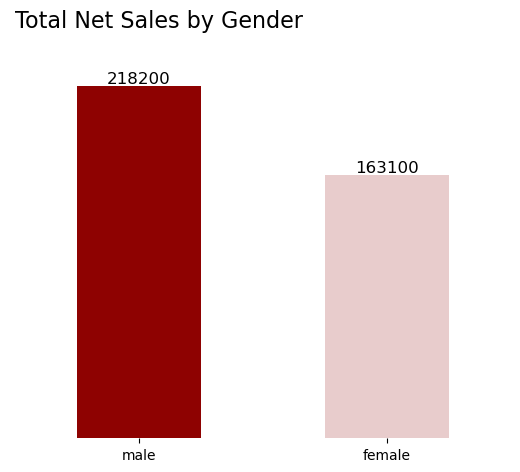

In [378]:
#plot the pivot table as a bar chart
plt1 = revenue.plot(kind='bar', legend=False)
plt1.set_title('Total Net Sales by Gender', fontsize = 16, loc='left', pad=30)   
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=12)
plt1.set_xlabel('')
plt1.set_yticks([], [])
plt1.tick_params(axis='x', rotation=0)
plt1.patches[0].set_facecolor('#8e0201')

• Lets Observe the customers age group with the highest number of sales

In [379]:
# create bins using pd.cut()
age_groups = pd.cut(df1.age, bins=[15, 20, 25, 30, 35, 40])
age_groups = [str(bin).replace(', ', '-').replace('(', '').replace(']', '') for bin in age_groups]
# group the data by the 'age_groups' col and calculate the sum of the 'orders' column
age_count = df1.groupby(age_groups)['orders'].sum().sort_values(ascending=False)
age_count

25-30    12
20-25    10
15-20     6
30-35     2
Name: orders, dtype: int64

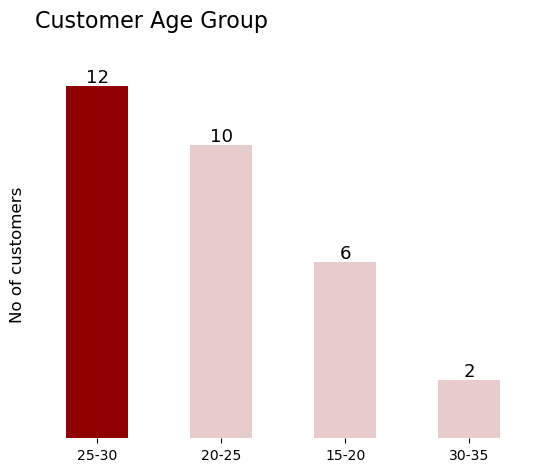

In [380]:
# plot a bar chart of the grouped dataframe
plt2 = age_count.plot(kind='bar')
plt2.set_title('Customer Age Group', fontsize = 16, loc='left', pad=30)
for i in plt2.containers:
    plt2.bar_label(i, label_type='edge', fontsize=13)
plt2.set_ylabel('No of customers', fontsize=12)
plt2.set_yticks([], [])
plt2.tick_params(axis='x', rotation=0)
plt2.patches[0].set_facecolor('#8e0201')

• Observing The customer conversion rate

In [382]:
# count the number of first-time and returning customers
counts = df1['customer_type'].value_counts()
counts

First-Time     20
Returning       1
Name: customer_type, dtype: int64

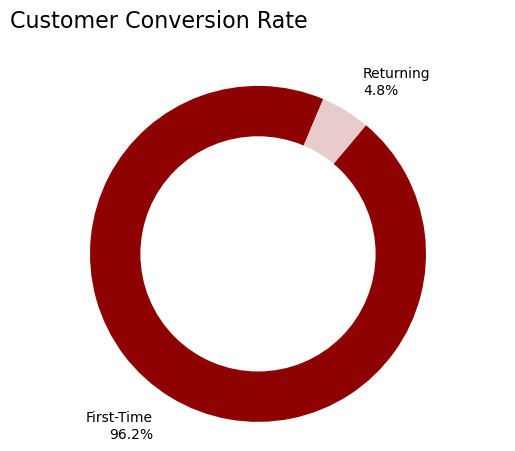

In [383]:
# create a doughnut chart
# set up the chart
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['First-Time\n96.2%', 'Returning\n4.8%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Customer Conversion Rate', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show()


• Lets observe the months with highest sales

In [384]:
# group the data by the 'month' col and calculate the sum of the 'net sales column' column
month_sales = df1.groupby('month')['net_sales'].sum()
month_sales

month
Jan     11700.0
Feb      8500.0
Mar         0.0
Apr         0.0
May      9500.0
Jun     11700.0
Jul     74600.0
Aug         0.0
Sep      9500.0
Oct     39000.0
Nov     15000.0
Dec    201800.0
Name: net_sales, dtype: float64

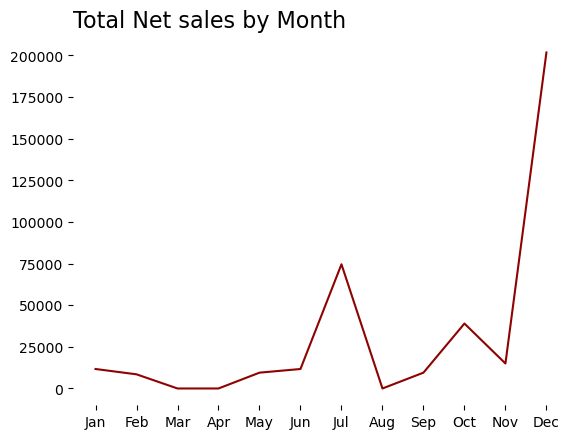

In [385]:
# plot a line chart
plt3 = month_sales.sort_index().plot(kind='line', legend=False, color='#8e0201')
plt3.set_title('Total Net sales by Month', fontsize = 16, loc='left')
plt3.set_xticks(np.arange(len(month_sales)))
plt3.set_xlabel('')
plt3.set_xticklabels(month_sales.index)
plt3.tick_params(axis='x', rotation=0)

• Lets Identify the products the with the most sales

In [386]:
# group the data by the 'bag_name' col and calculate the sum of the 'units_sold' column arranged in descending order
bag_count = df2.groupby('bag_name')['unit_sold'].sum().sort_values(ascending=False).head() 
bag_count

bag_name
Adeola maxi        6
Kemi asooke        5
Classic Laptop     4
 Teni Backpack     3
Diji satchel       3
Name: unit_sold, dtype: int64

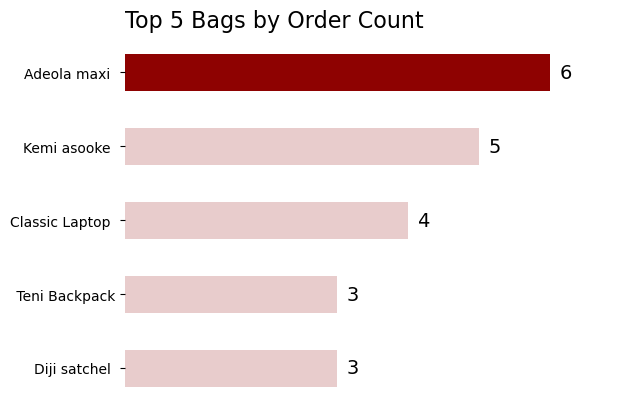

In [387]:
# plot a horizontal bar chart of the grouped dataframe
plt4 = bag_count.iloc[::-1].plot(kind='barh',  legend=False)
plt4.set_title('Top 5 Bags by Order Count', fontsize = 16, loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 7)
plt4.patches[4].set_facecolor('#8e0201')

• The top five bags with the highest sales

In [388]:
# group the data by the 'bag_name' col and calculate the sum of the 'net sales' column in descending order
bag_name = df2.groupby('bag_name')['net_sales'].sum().sort_values(ascending=False).head() 
bag_name

bag_name
Adeola maxi        112800.0
Kemi asooke         67000.0
Classic Laptop      41500.0
Diji satchel        38600.0
 Teni Backpack      34200.0
Name: net_sales, dtype: float64

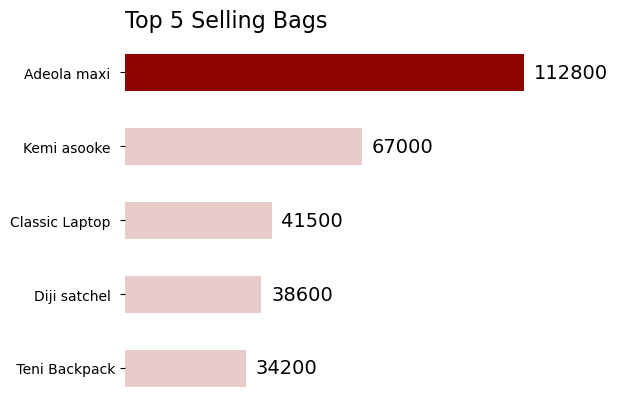

In [389]:
# plot a horizontal bar chart of the grouped dataframe
plt5 = bag_name.iloc[::-1].plot(kind='barh', legend=False)
plt5.set_title('Top 5 Selling Bags', fontsize = 16, loc='left')
for i in plt5.containers:
    plt5.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt5.set_xticks([], [])
plt5.set_ylabel('')
plt5.set_xlim(0, 140000)
plt5.patches[4].set_facecolor('#8e0201')

In [ ]:
• Lets Identify the total number of bags sold per month

In [390]:
# group the data by the 'month' col and calculate the sum of the 'order' column 
month_orders = df1.groupby('month')['orders'].sum()
month_orders


month
Jan     1
Feb     1
Mar     0
Apr     0
May     1
Jun     1
Jul     6
Aug     0
Sep     1
Oct     3
Nov     1
Dec    15
Name: orders, dtype: int64

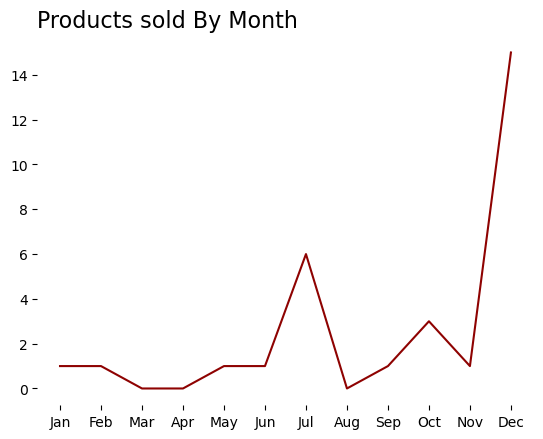

In [391]:

# plot a line chart
plt6 = month_orders.sort_index().plot(kind='line', legend=False, color='#8e0201')
plt6.set_title('Products sold By Month', fontsize = 16, loc='left')
plt6.set_xticks(np.arange(len(month_sales)))
plt6.set_xticklabels(month_sales.index)
plt6.set_xlabel('')
plt6.tick_params(axis='x', rotation=0)

• To observe the traffic source with the highest percentage of sales 

In [392]:
traffic = df1['traffic_source'].value_counts(normalize=True)*100
percent = traffic.round(1).astype(str).add('%')
percent

paid ads          33.3%
social network    28.6%
referal           23.8%
organic search     9.5%
direct             4.8%
Name: traffic_source, dtype: object

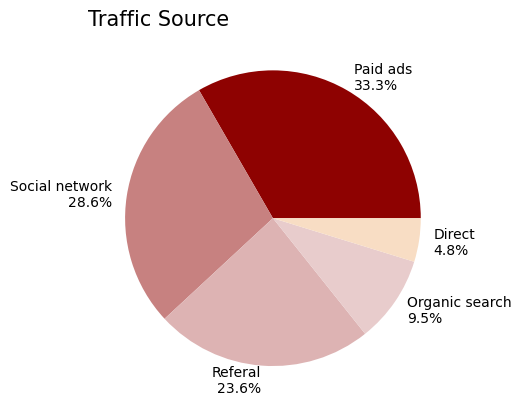

In [393]:
#Plot a pie Chart
label = ['Paid ads\n33.3%', 'Social network\n28.6%', 'Referal\n23.6%', 'Organic search\n9.5%', 'Direct\n4.8%']
mycolors = ['#8e0201', '#c78180', '#ddb3b3', '#e8cccc', '#f8ddc4' ]
plt4 = traffic.plot(kind='pie', labels=label, colors=mycolors)
plt4.set_title('Traffic Source', fontsize = 15, loc='left')
plt4.set_ylabel('')
plt4.set_facecolor('red')


• Key Performance Indicators for Overall Performance

In [ ]:
df1 = df1.assign(col=['KPI']*21, inplace=True)

# Create a new column that contains the sum of col2 and col3 for each row
df1['total_revenue'] = df1['coupon_amount'] + df1['gross_sales']

# create pivot tables
pivot1 = pd.pivot_table(df1, values='net_sales', index=None, columns='col', aggfunc=sum)
pivot2 = pd.pivot_table(df1, values='order_id', index=None, columns='col', aggfunc=pd.Series.nunique)
pivot3 = pd.pivot_table(df1, values='orders', index=None, columns='col', aggfunc=sum)
pivot4 = pd.pivot_table(df1, values='coupon_amount', index=None, columns='col', aggfunc=sum)
pivot5 = pd.pivot_table(df1, values='total_revenue', index=None, columns='col', aggfunc=sum)

## Data Visualization Using Matplotlib 

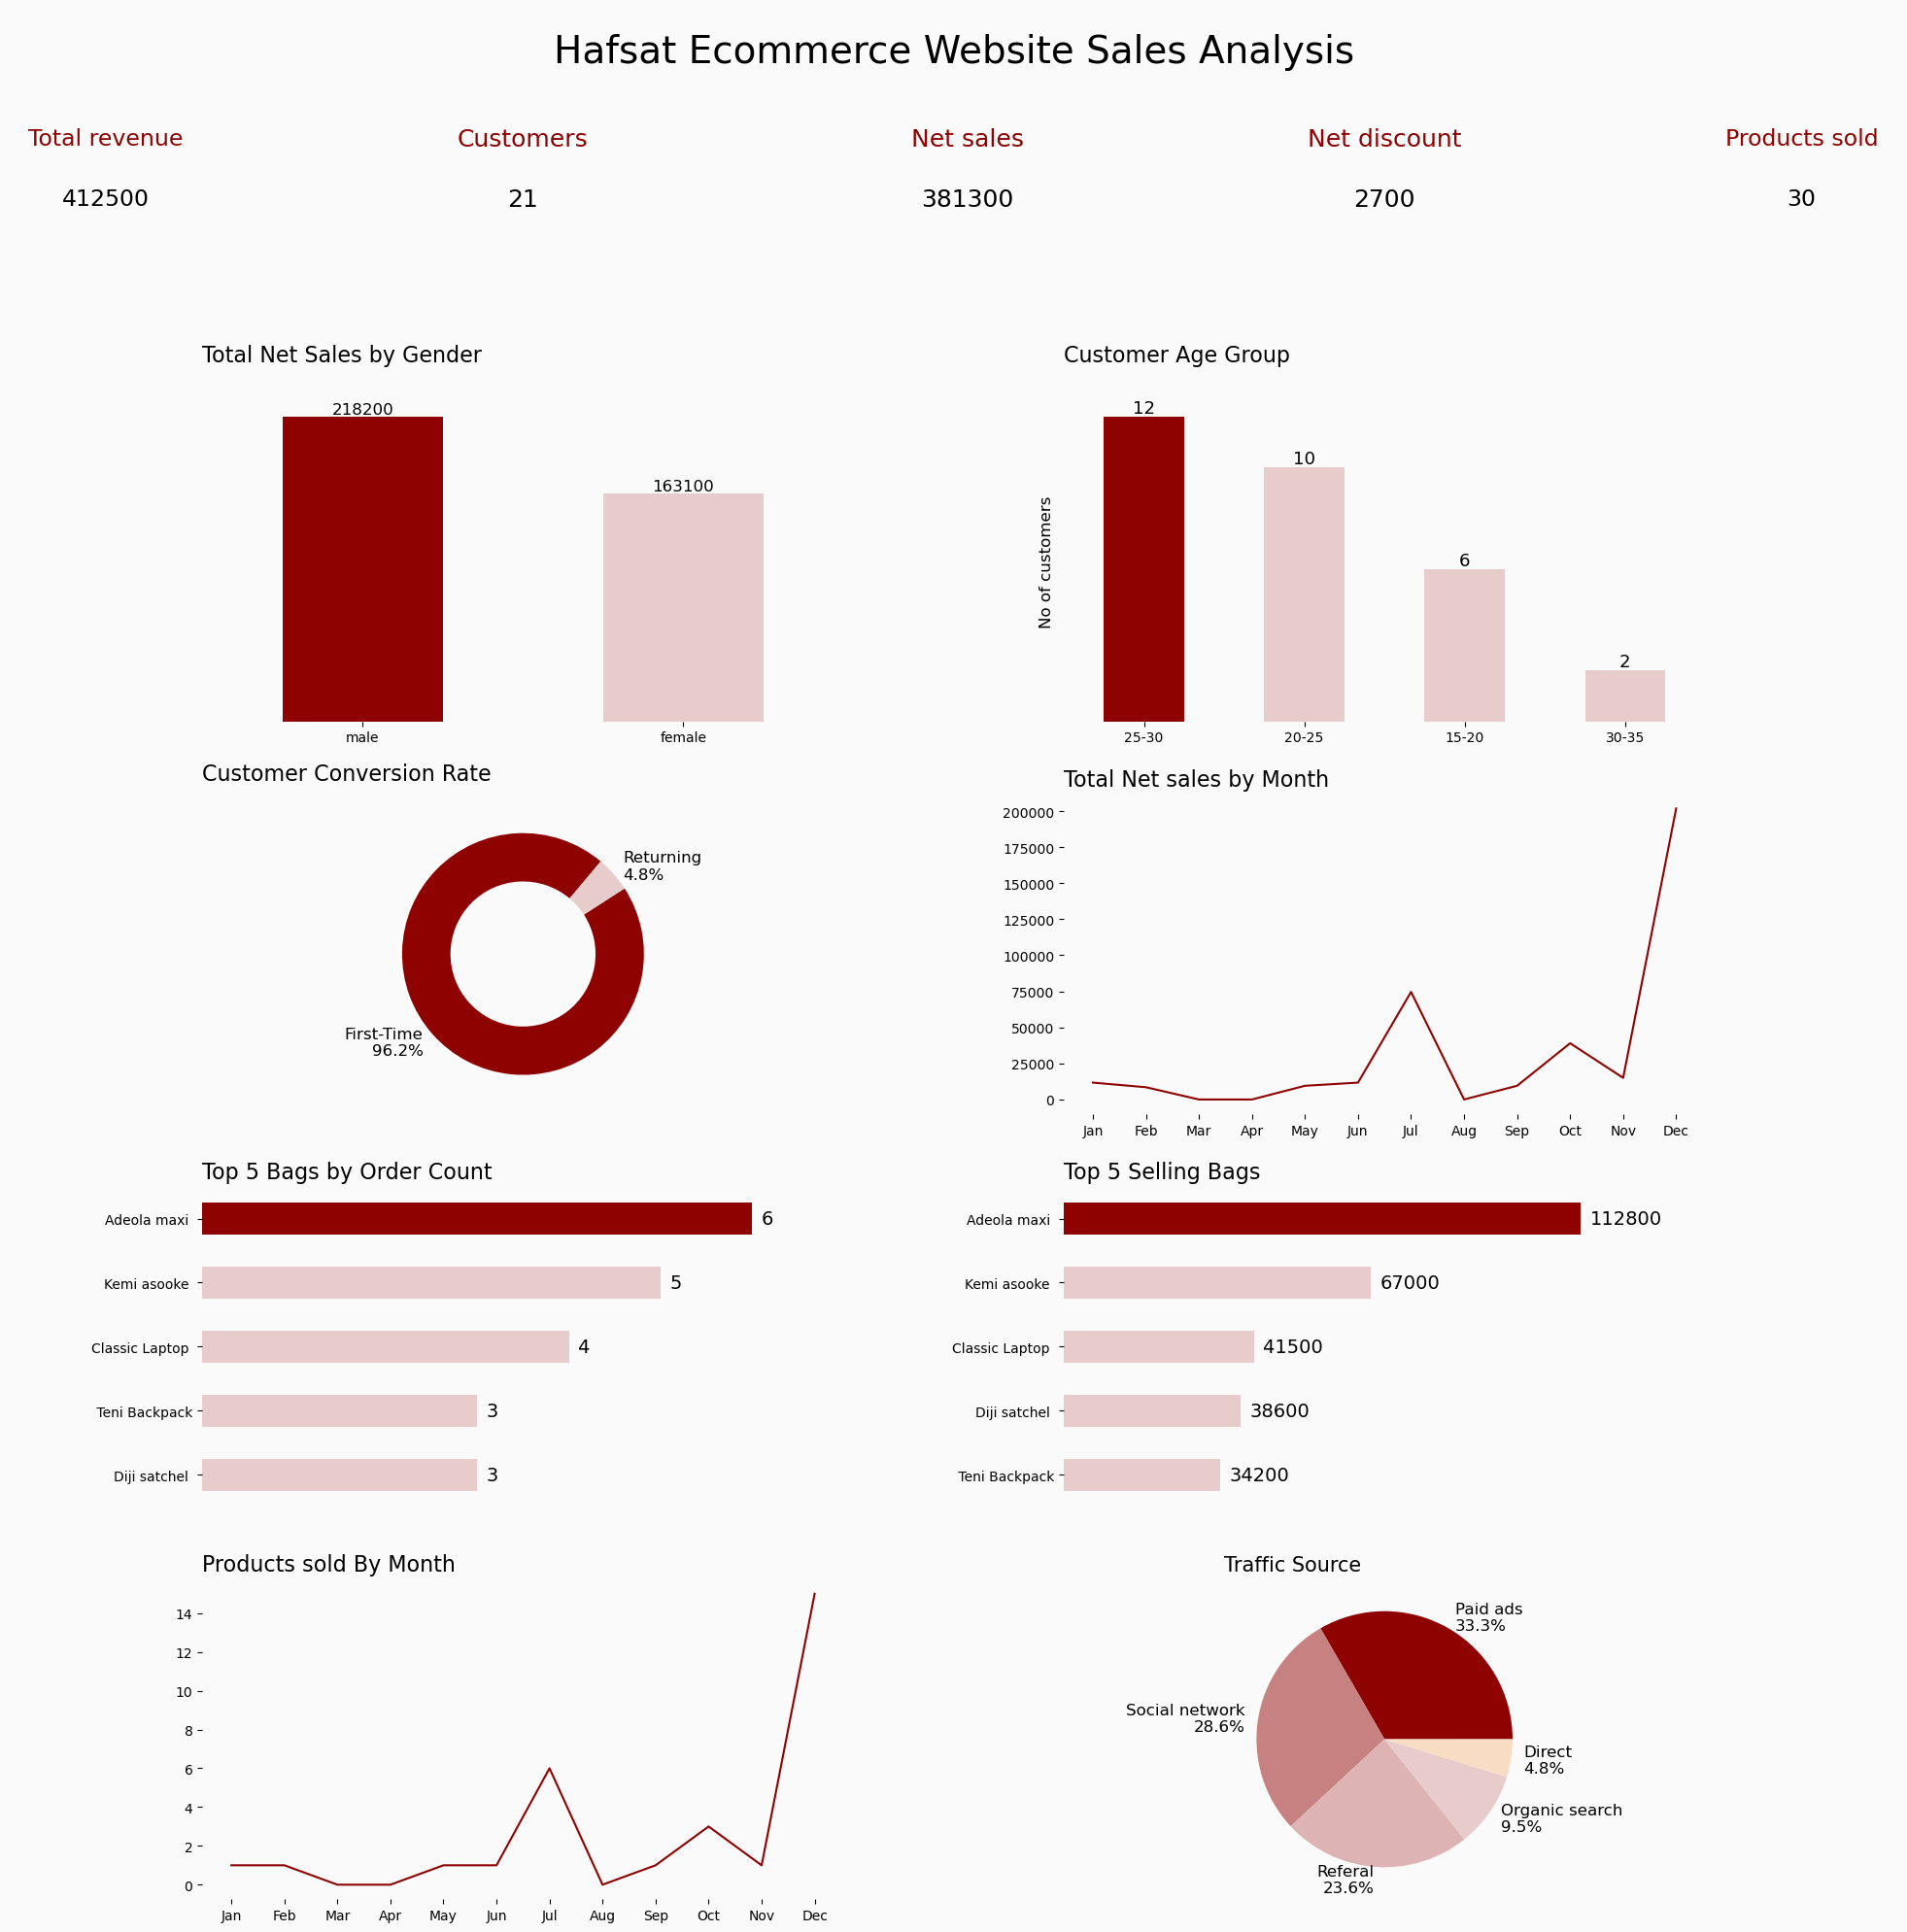

In [394]:
#Create figure and subplots for the Dasboard
fig, axs = plt.subplots(5, 2, figsize=(20, 20), facecolor='#fafafa')

# set the dashboard default edge color 
plt.rcParams['axes.edgecolor'] = 'none'

# set the dashboard default color cycle 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#e8cccc'])

#Total Net Sales by Gender
plt1 = revenue.plot(kind='bar', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Total Net Sales by Gender', fontsize = 16, loc='left', pad=30)   
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=12)
plt1.set_xlabel('')
plt1.set_yticks([], [])
plt1.tick_params(axis='x', rotation=0)
plt1.patches[0].set_facecolor('#8e0201')

# Customer Age Group
plt2 = age_count.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Customer Age Group', fontsize = 16, loc='left', pad=30)
for i in plt2.containers:
    plt2.bar_label(i, label_type='edge', fontsize=13)
plt2.set_ylabel('No of customers', fontsize=12)
plt2.set_yticks([], [])
plt2.tick_params(axis='x', rotation=0)
plt2.patches[0].set_facecolor('#8e0201')

# Customer Conversion Rate
colors = ['#8e0201', '#e8cccc']
label = ['First-Time\n96.2%', 'Returning\n4.8%']
axs[2, 0].pie(counts, labels=label, colors=colors, startangle=50, pctdistance=0.85, wedgeprops={'width':0.4})
axs[2, 0].axis('equal') 
circle = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
axs[2, 0].set_title('Customer Conversion Rate', fontsize = 16, loc='left', pad=10)
# adjust the size of the doughnut chart
axs[2, 0].set_xlim(-1, 1)
axs[2, 0].set_ylim(-1, 1)
axs[2, 0].set_autoscale_on(False)
# increase the font size of the labels
for text in axs[2, 0].texts:
    text.set_fontsize(12)

# Total Net sales by Month
plt3 = month_sales.sort_index().plot(kind='line', legend=False, color='#8e0201', ax=axs[2, 1])
axs[2, 1].set_title('Total Net sales by Month', fontsize = 16, loc='left')
plt3.set_xticks(np.arange(len(month_sales)))
plt3.set_xlabel('')
plt3.set_xticklabels(month_sales.index)
plt3.tick_params(axis='x', rotation=0)

# Top 5 Bags by Order Count
plt4 = bag_count.iloc[::-1].plot(kind='barh',  legend=False, ax=axs[3, 0])
axs[3, 0].set_title('Top 5 Bags by Order Count', fontsize = 16, loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 7)
plt4.patches[4].set_facecolor('#8e0201')

# Top 5 Selling Bags
plt5 = bag_name.iloc[::-1].plot(kind='barh', legend=False, ax=axs[3, 1])
axs[3, 1].set_title('Top 5 Selling Bags', fontsize = 16, loc='left')
for i in plt5.containers:
    plt5.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt5.set_xticks([], [])
plt5.set_ylabel('')
plt5.set_xlim(0, 140000)
plt5.patches[4].set_facecolor('#8e0201')

# Products sold By Month
plt6 = month_orders.sort_index().plot(kind='line', legend=False, color='#8e0201', ax=axs[4, 0])
axs[4, 0].set_title('Products sold By Month', fontsize = 16, loc='left')
plt6.set_xticks(np.arange(len(month_sales)))
plt6.set_xticklabels(month_sales.index)
plt6.set_xlabel('')
plt6.tick_params(axis='x', rotation=0)

# Traffic Source
label = ['Paid ads\n33.3%', 'Social network\n28.6%', 'Referal\n23.6%', 'Organic search\n9.5%', 'Direct\n4.8%']
mycolors = ['#8e0201', '#c78180', '#ddb3b3', '#e8cccc', '#f8ddc4' ]
plt4 = traffic.plot(kind='pie', labels=label, colors=mycolors, ax=axs[4, 1])
axs[4, 1].set_title('Traffic Source', fontsize = 15, loc='left')
plt4.set_ylabel('')
axs[4, 1].set_facecolor('red')

# increase the font size of the labels
for text in axs[4, 1].texts:
    text.set_fontsize(12)
    
# Key Performance Indicators
kpis = [axs[0, 1].table(cellText=pivot1.values.round(), colLabels=['Net sales'], loc='left', cellLoc='center'),
        axs[0, 0].table(cellText=pivot2.values.round(),colLabels=['Customers'], loc='center', cellLoc='center'),
        axs[0, 1].table(cellText=pivot3.values.round(), colLabels=['Products sold'], loc='right', cellLoc='center'),
        axs[0, 1].table(cellText=pivot4.values.round(),colLabels=['Net discount'], loc='center', cellLoc='center'),
        axs[0, 0].table(cellText=pivot5.values.round(), colLabels=['Total revenue'], loc='left', cellLoc='center'),
        ]
#Remove background color for all rows, set font size and scaling of tables, remove table borders
for kpi in kpis:
    kpi.set_fontsize(18)
    kpi.scale(0.3, 3)
    for cell in kpi._cells:
        kpi._cells[cell].set_linewidth(0)
        kpi._cells[cell].set_color('none')
        if cell == (0, 0):
            kpi._cells[cell].set_text_props(color='#8e0201')
        elif cell[0] == 1:
            kpi._cells[cell].set_text_props(weight='normal', color='black', fontsize=20)
for ax in axs.flatten():
    ax.set_facecolor('None')
axs[0, 1].axis('off')
axs[0, 0].axis('off')

#Adjust spacing between subplots
fig.tight_layout()

#Add overall title to the Dashboard
fig.suptitle('Hafsat Ecommerce Website Sales Analysis', fontsize=28)

#Display the Dashboard
plt.show()